In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [5]:
df = pd.read_csv("../data/retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime("%b")

In [10]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Year                0
Month               0
Month_Name          0
dtype: int64

In [11]:
sns.set(style="whitegrid")

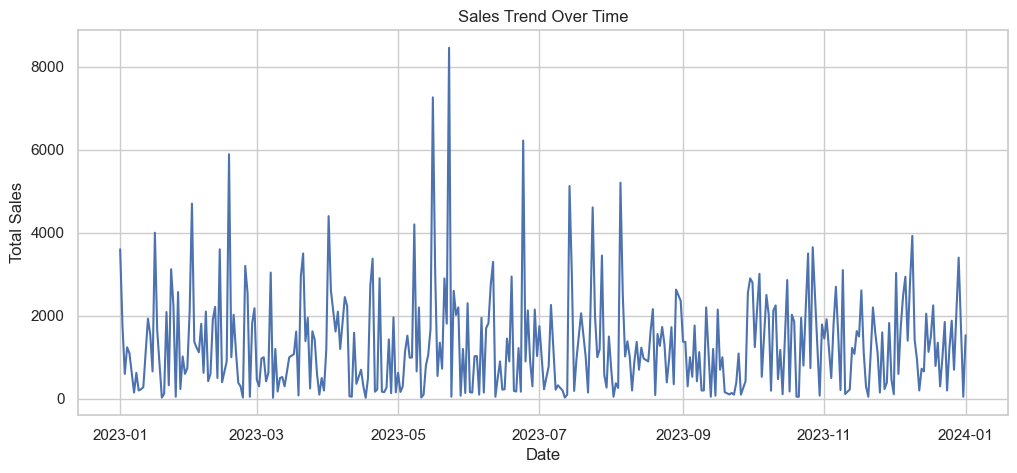

In [12]:
sales_over_time = df.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(12,5))
plt.plot(sales_over_time)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

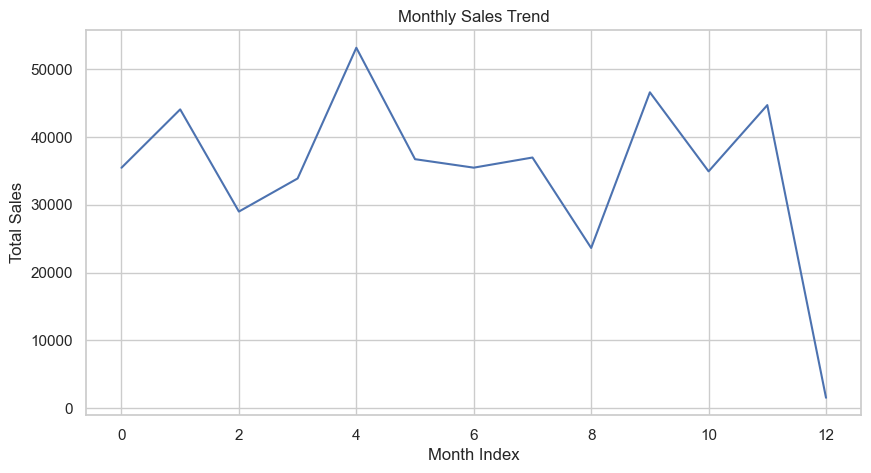

In [13]:
monthly_sales = df.groupby(['Year','Month'])['Total Amount'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Total Amount'])
plt.title("Monthly Sales Trend")
plt.xlabel("Month Index")
plt.ylabel("Total Sales")
plt.show()

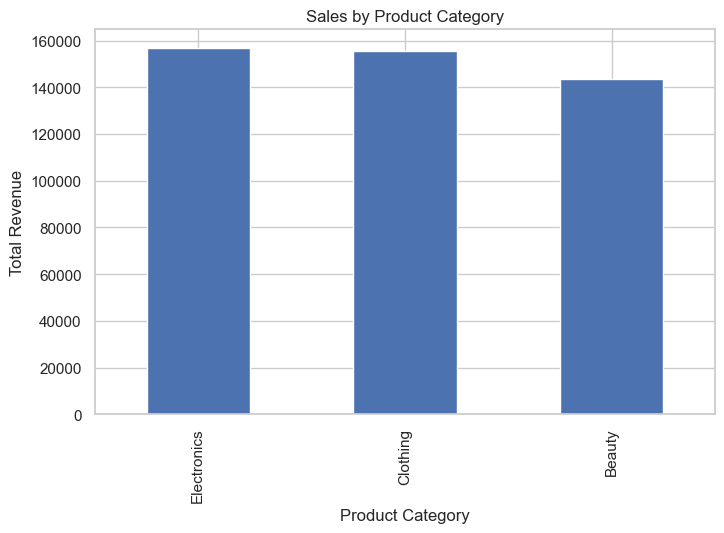

In [14]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar', figsize=(8,5))
plt.title("Sales by Product Category")
plt.ylabel("Total Revenue")
plt.show()

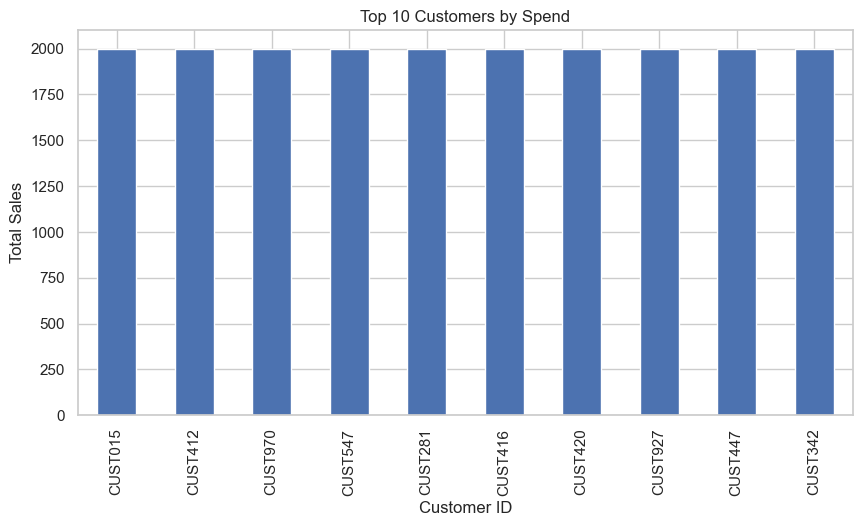

In [15]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Customers by Spend")
plt.ylabel("Total Sales")
plt.show()

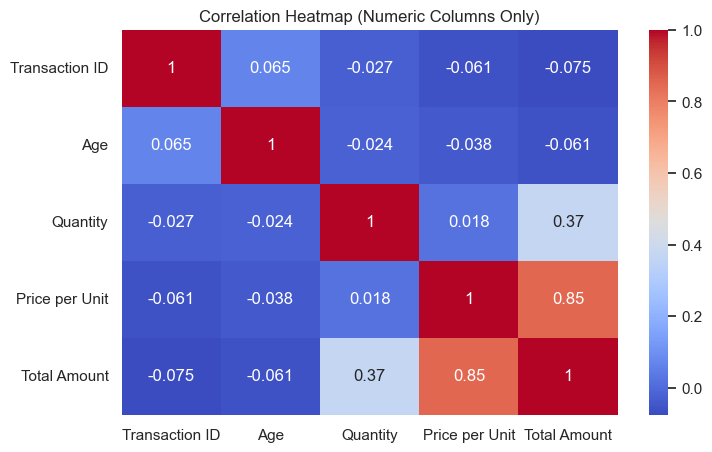

In [17]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

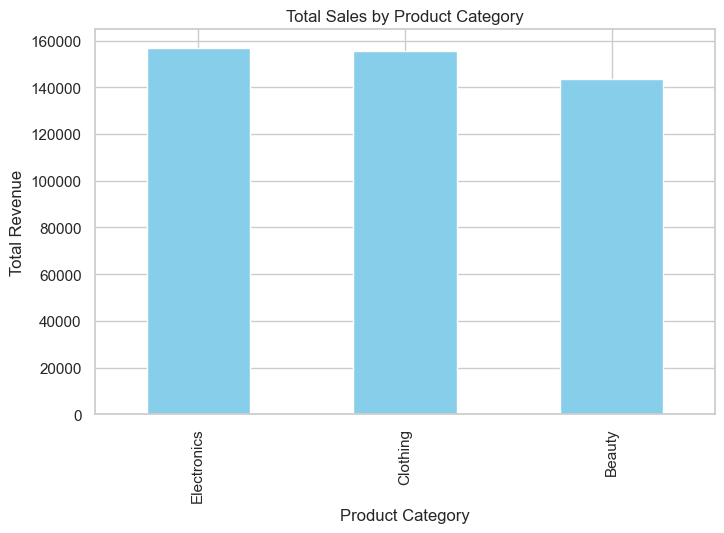

In [18]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Product Category")
plt.ylabel("Total Revenue")
plt.xlabel("Product Category")
plt.show()

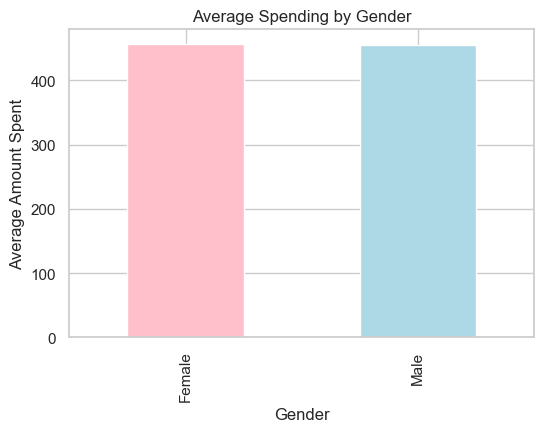

In [19]:
gender_spend = df.groupby('Gender')['Total Amount'].mean()

plt.figure(figsize=(6,4))
gender_spend.plot(kind='bar', color=['pink','lightblue'])
plt.title("Average Spending by Gender")
plt.ylabel("Average Amount Spent")
plt.show()

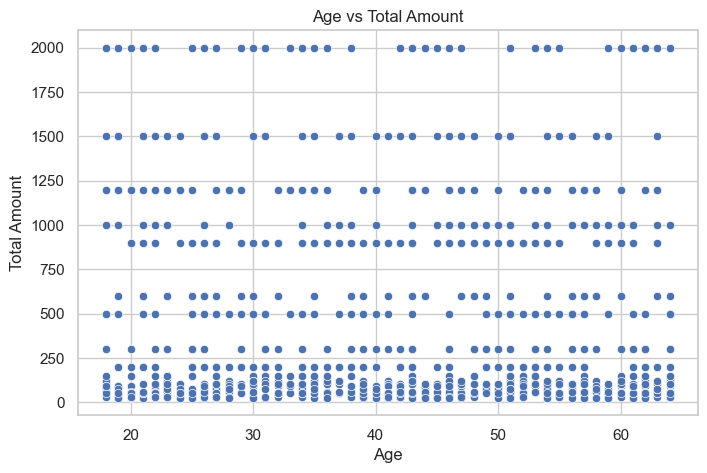

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Total Amount', data=df)
plt.title("Age vs Total Amount")
plt.show()

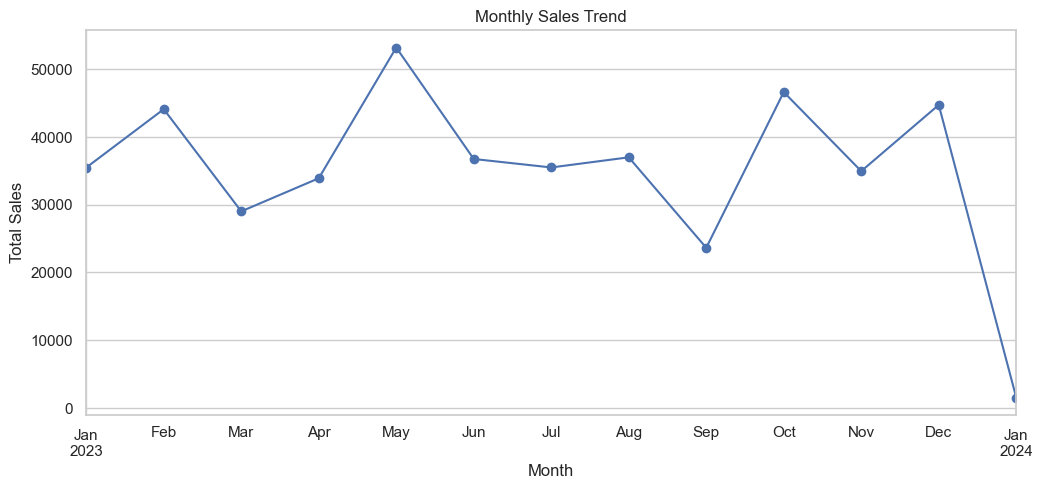

In [21]:
monthly = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()

plt.figure(figsize=(12,5))
monthly.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()

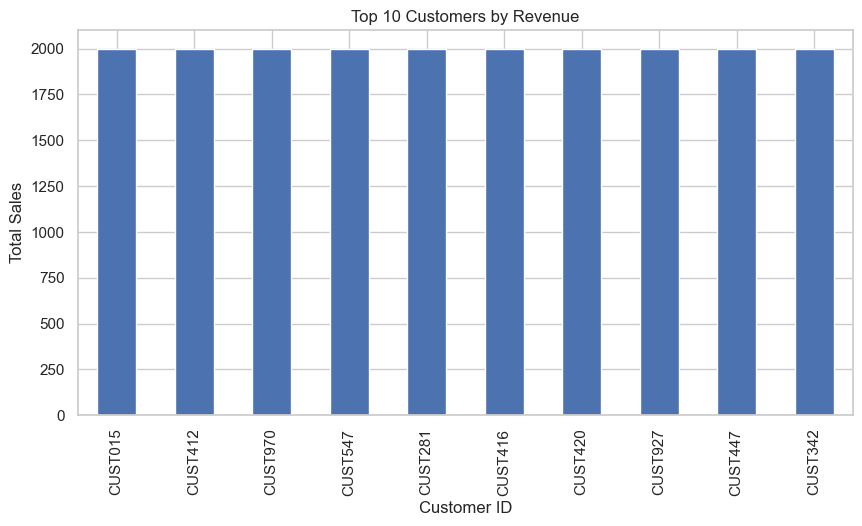

In [22]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Revenue")
plt.ylabel("Total Sales")
plt.show()

INSIGHTS

Insight 1 – Clothing Generates Highest Revenue
Clothing category contributes the maximum to total sales because of higher price per unit and more frequent purchases.

Insight 2 – Female Customers Spend More
Female customers have a higher average spend per transaction compared to male customers.

Insight 3 – Sales Peak in Q4
Festive season (October–December) shows a major spike in total sales volume.

Insight 4 – 20% Customers Bring 70% Revenue
A small group of top customers (Pareto Principle) contributes the majority of total revenue.

Insight 5 – Positive Correlation Observed
Quantity ↑ → Total Amount ↑
Price per Unit ↑ → Total Amount ↑

RECOMMENDATIONS

Increase stock for best-selling categories like Clothing.

Offer targeted discounts/promotions for female customers.

Start loyalty programs for high-value customers.

Increase marketing campaigns during festive months (Q4).

Improve inventory planning using monthly demand trends.